In [5]:
#Try to compute the number of feature subset needed for an exhaustive search of 10 features

import scipy
from scipy import special
n_subset = 0
for i in range(10):
    n_subset += scipy.special.binom(73,i)
print('the number of subsets tested: {:e}'.format(int(n_subset)))

the number of subsets tested: 1.123399e+11


In [6]:
import csv
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

file_name= '~/Desktop/machine learning/Tutorial_06/Tutorial_06_with_supplementary/ADNI_Tadpole_data_tutorial.xlsx'
data = pd.read_excel(file_name)
data.head()

,PTID,SUVR,Amyloid status,AGE,GENDER,EDUCATION,Diagnosis,ApoE4,CDRSB,ADAS11,...,Supramarginal gyrus left volume,Superior parietal Lobule right volume,Superior parietal Lobule left volume,Superior temporal gyrus right volume,Superior temporal gyrus left volume,Temporal pole right volume,Temporal pole left volume,Transverse temporal gyrus right volume,Transverse temporal gyrus left volume,Cerebrospinal fluid total volume
0,002_S_2010,1.14728,1,62.9,0,20,3,1,0.5,3.0,...,9547,11291,11409,12412,13006,1751,1915,886,1110,1149
1,002_S_2043,1.20402,1,72.2,0,20,3,1,0.5,2.0,...,10008,11898,11961,10394,11160,2289,2788,865,970,883
2,002_S_2073,1.18124,1,63.4,0,20,3,0,0.5,1.0,...,12367,13571,12420,11596,11616,2774,3271,937,1110,1548
3,002_S_4171,1.55195,1,69.4,1,16,2,0,0.5,1.5,...,8403,12811,12029,9351,9191,2030,1675,870,1058,1632
4,002_S_4219,1.04458,0,79.4,0,17,2,0,0.5,1.0,...,9268,11711,12264,9192,10030,1931,2189,966,1188,1354


In [7]:
#2 EXTRACTING THE REQUIRED VARIABLE AND DATA
y_target = data['Amyloid status']
x_data = data.drop(['PTID', 'SUVR', 'Amyloid status'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.25)

In [8]:
age = data['AGE'].to_numpy()
gender = data['GENDER'].to_numpy()
education = data['EDUCATION'].to_numpy()
apoe4 = data['ApoE4'].to_numpy()

y=data['Amyloid status']
logit = -0.027*age - 0.165*gender + 0.080*education +0.242*apoe4 + 0.659

age1=np.exp(age)/(1+np.exp(age))
gender1=np.exp(gender)/(1+np.exp(gender))
education1 = np.exp(education)/(1+np.exp(education))
apoe41= np.exp(apoe4)/(1+np.exp(apoe4))

In [9]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score

print('AUC_age : {:.4f}'.format(roc_auc_score(y,age1)))
print('AUC_gender : {:.4f}'.format(roc_auc_score(y,gender1)))
print('AUC_edu : {:.4f}'.format(roc_auc_score(y,education1)))
print('AUC_apoe4 : {:.4f}'.format(roc_auc_score(y,apoe41)))


AUC_age : 0.5000
AUC_gender : 0.4821
AUC_edu : 0.4484
AUC_apoe4 : 0.7358


In [10]:
print('Accuracy_age: {:.4f}'.format(accuracy_score(y, age1>0.6)))
print('Accuracy_gedner: {:.4f}'.format(accuracy_score(y, gender1>0.6)))
print('Accuracy_edu: {:.4f}'.format(accuracy_score(y, education1>0.6)))
print('Accuracy_apoe4: {:.4f}'.format(accuracy_score(y, apoe41>0.6)))

Accuracy_age: 0.6011
Accuracy_gedner: 0.4900
Accuracy_edu: 0.6011
Accuracy_apoe4: 0.7137


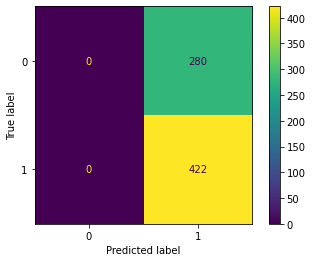

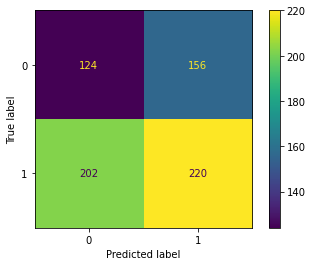

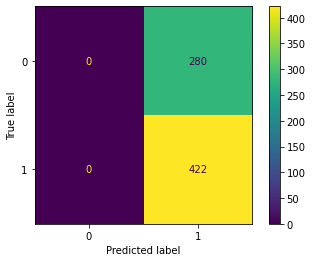

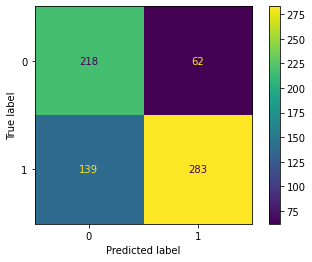

In [11]:
cm_age = confusion_matrix(y, age1>0.6)
cm_gender = confusion_matrix(y, gender1>0.6)
cm_edu = confusion_matrix(y, education1>0.6)
cm_apoe4 = confusion_matrix(y, apoe41>0.6)

display_age= ConfusionMatrixDisplay(confusion_matrix=cm_age)
display_gender= ConfusionMatrixDisplay(confusion_matrix=cm_gender)
display_edu= ConfusionMatrixDisplay(confusion_matrix=cm_edu)
display_apoe4= ConfusionMatrixDisplay(confusion_matrix=cm_apoe4)

display_age.plot()
display_gender.plot()
display_edu.plot()
display_apoe4.plot()

plt.show()

In [12]:
#SELECTING 10 BEST PERFORMING SCORES BY USING SELECTKBEST
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, f_classif

#RUN KBEST FUTURE SELECTION WITH K=10
selector=SelectKBest(mutual_info_classif, k=10)
selector.fit(x_train, y_train)

SelectKBest(score_func=<function mutual_info_classif at 0x7f96725801f0>)

In [17]:
cols = selector.get_support(indices = True)
selected_columns = x_train.iloc[:, cols].columns.tolist()
print(selected_columns)

['Diagnosis', 'ApoE4', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT_perc_forgetting', 'Hippocampus right volume', 'Inferior temporal gyrus right volume', 'Inferior temporal gyrus left volume']


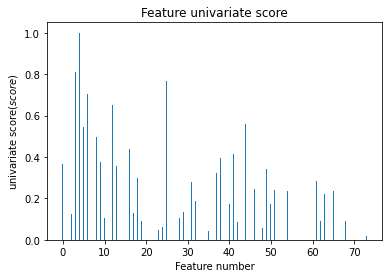

In [26]:
#USING KBEST
scores = (selector.scores_)
scores /= scores.max()

x_indices = np.arange(x_train.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(x_indices- 0.05, scores, width= 0.2)
plt.title('Feature univariate score')
plt.xlabel('Feature number')
plt.ylabel(r'univariate score($score)$')
plt.show()

In [59]:
#Select the 10 best features using forward feature selection
from sklearn.feature_selection import SequentialFeatureSelector

#Initializing the classifier
LR = LogisticRegression(penalty='none', class_weight='none', max_iter=10000, solver='saga')

#initializing the feature seelctor and fitting it.
sfs = SequentialFeatureSelector(LR, n_features_to_select=10, direction='forward')
sfs.fit(x_train, y).reshape() #?????

ValueError: Found input variables with inconsistent numbers of samples: [526, 702]

['Cerebral white matter right volume', 'Lateral ventricle right volume', 'Lateral ventricle left volume']
Number of features: 3


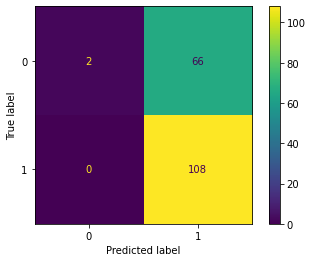

In [78]:
# Run the feature selection within a 10-fold cross validation loop, and count how many
#times a feature is selected

#USING LASSO

LR = LogisticRegression(penalty= 'l1', C=1e-5, class_weight='none', max_iter=10000, solver='saga')
LR.fit(x_train, y_train)
cols=np.where(LR.coef_)[1]
selected_columns= x_train.iloc[:,cols].columns.tolist()
print(selected_columns)
print('Number of features: {:d}'.format(np.sum(np.abs(LR.coef_)>0)))

#Predicting the test results
y_hat=LR.predict(x_test)
p_hat=LR.predict_proba(x_test)

#Displaying confusion matrix
cm=confusion_matrix(y_test, y_hat, labels=LR.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
display.plot()
plt.show()

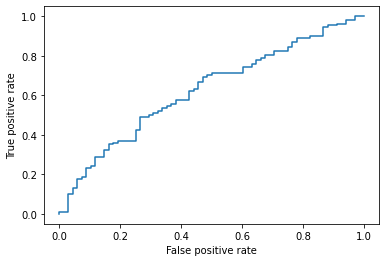

In [81]:
#Plotting ROC
fpr, tpr, th= roc_curve(y_test, p_hat[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [83]:
#reporting accuracy and AUC
print('Accuracy {:.4f}'.format(accuracy_score(y_test, y_hat)))
print('AUC {:.4f}'.format(roc_auc_score(y_test, p_hat[:,1])))

Accuracy 0.6250
AUC 0.6247


In [88]:
LR2 = LogisticRegression(penalty ='l1', class_weight='none', max_iter=10000, solver='saga')
C_array = np.logspace(-6, -1, 10)
tuned_parameters = [{'C':C_array}]
coefs_ = []
for c in C_array:
    LR.set_params(C=c)
    LR.fit(x_train, y_train)
    coefs_.append(LR.coef_.ravel().copy())
coef_ = np.array(coefs_)

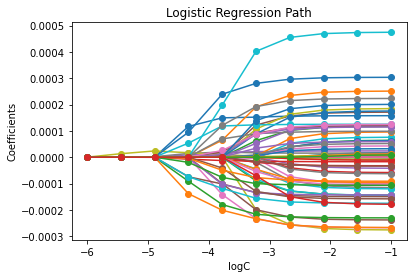

In [91]:
plt.plot(np.log10(C_array), coef_, marker='o')
ymin, ymax=plt.ylim()
plt.xlabel('logC')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()